In [42]:
# Visualizes the location visit durations across different demographic (e.g., emplotyment) and mental health (e.g. depression)
# groups

import pickle
import os
import numpy as np
import pandas as pd
from preprocess import preprocess_location

# reading top locations
with open('top_locations.dat','rb') as f:
    location_top = pickle.load(f)
f.close()

# reading assessments
with open('../Assessment/assessment.dat','rb') as f:
    data = pickle.load(f)
f.close()

# reading demographics
with open('../Demographics/demo.dat','rb') as f:
    demo = pickle.load(f)
f.close()

# adding demo to dataframe
data.insert(loc=len(data.columns), column='gender', value=np.nan)
data.insert(loc=len(data.columns), column='age', value=np.nan)
data.insert(loc=len(data.columns), column='employment', value=np.nan)

# remove subject with spoofed GPS
ind_spoof = np.where(data['ID']=='1515656')[0]
data.drop(data.index[ind_spoof])
data = data.reset_index(drop=True)

for (i,subj) in enumerate(data['ID']):
    ind = np.where(demo['ID']==subj)[0][0]
    data.loc[i,'gender'] = demo.loc[ind, 'gender']
    data.loc[i,'age'] = demo.loc[ind, 'age']
    data.loc[i,'employment'] = demo.loc[ind, 'employment']

# adding durations to dataframes
for loc_top in location_top:
    data.insert(loc=len(data.columns), column=loc_top, value=np.nan)

folders = os.listdir('data/')

for fol in folders:
    ind_subject = np.where(data['ID']==fol)[0][0]
    subfolders = os.listdir('data/'+fol)
    data.loc[ind_subject, location_top] = 0
    dur_all = 0
    
    for subf in subfolders:
        file_eml = 'data/'+fol+'/'+subf+'/eml.csv'
        file_fus = 'data/'+fol+'/'+subf+'/fus.csv'
        
        if os.path.exists(file_eml) and os.path.exists(file_fus):
            
            df = pd.read_csv(file_eml, sep='\t', header=None)
            loc = preprocess_location(df.loc[0,6], parse=False)
            
            df = pd.read_csv(file_fus, sep='\t', header=None)
            
            t = np.array(df.loc[:,0])
            tdiff = t[1:]-t[:-1]
            tdiff = tdiff[tdiff<600]
            dur = np.sum(tdiff)

            if loc in location_top:
                data.loc[ind_subject, loc] += dur
            dur_all += dur
            
    data.loc[ind_subject, location_top] /= dur_all #normalize


In [43]:
data

,ID,PHQ9 W0,GAD7 W0,SPIN W0,PHQ9 W3,GAD7 W3,SPIN W3,PHQ9 W6,GAD7 W6,SPIN W6,...,Nightlife Spot,Spiritual,Outdoors & Recreation,Arts & Entertainment,Work,Professional Or Medical Office,Another's Home,Food,Home,Shop Or Store
0,25349,6,10,22,3,5,31,1,2,37,...,0.000000,0.000000,0.000000,0.000000,0.273504,0.003604,0.019397,0.021828,0.675472,0.005390
1,38880,5,13,15,6,14,15,4,6,20,...,0.000000,0.001749,0.000000,0.000000,0.121003,0.001373,0.160611,0.001421,0.489577,0.061692
2,39468,12,11,28,13,15,26,9,8,30,...,0.000555,0.001314,0.000206,0.017962,0.152015,0.009985,0.122615,0.042874,0.555609,0.021919
3,62977,2,1,20,3,0,27,2,1,15,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002630,0.003865,0.986058,0.007448
4,97397,20,9,25,15,5,28,19,10,25,...,0.000000,0.000526,0.013007,0.000000,0.161897,0.004521,0.027456,0.035030,0.746239,0.005354
5,98384,15,4,12,16,4,15,14,9,18,...,0.000000,0.002552,0.000000,0.000000,0.175502,0.000000,0.308266,0.011330,0.487059,0.014538
6,106743,1,1,9,4,1,3,2,1,2,...,0.000000,0.000000,0.000000,0.012382,0.281589,0.000000,0.048441,0.029838,0.457428,0.121777
7,345921,2,18,5,8,10,8,8,9,3,...,0.000000,0.000000,0.000000,0.013189,0.232516,0.000788,0.014523,0.010679,0.334201,0.006704
8,391378,13,7,45,15,6,48,15,9,51,...,0.000000,0.000000,0.000000,0.000000,0.218332,0.000000,0.006370,0.000000,0.731151,0.001107
9,411896,10,10,11,16,16,9,15,16,15,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003205,0.017494,0.853012,0.008909


In [44]:
def remove_parentheses(ss):
    ss = np.array(ss)
    for i in range(ss.size):
        s = ss[i].split('(')
        s = s[0]
        ss[i] = s
    return ss

/mnt/c/Users/Sohrob/Dropbox/Code/CS120/SemanticLocation/utils.py:25: RuntimeWarning: invalid value encountered in sqrt
  tt = data_cov[i,j]*np.sqrt(nn-2)/np.sqrt(1-data_cov[i,j]**2)
/mnt/c/Users/Sohrob/Dropbox/Code/CS120/SemanticLocation/utils.py:26: RuntimeWarning: invalid value encountered in absolute
  pval[i,j] = stats.t.sf(np.abs(tt), nn-1)*2
/mnt/c/Users/Sohrob/Dropbox/Code/CS120/SemanticLocation/utils.py:25: RuntimeWarning: divide by zero encountered in double_scalars
  tt = data_cov[i,j]*np.sqrt(nn-2)/np.sqrt(1-data_cov[i,j]**2)
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater_equal
  from ipykernel import kernelapp as app


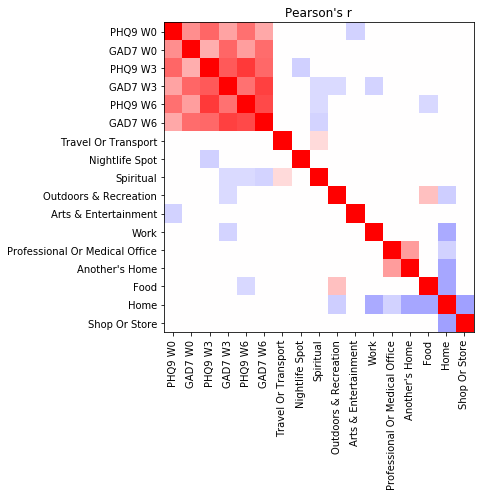

In [45]:
# correlation matrix

from soplata import *
from utils import *

data_new = data.drop(['ID','SPIN W0','SPIN W3','SPIN W6','gender','employment','age'],axis=1)
data_cov, pval = calculate_covariance(data_new.values.astype(float))

%matplotlib inline

# truncate labels
# labs = [lab[0:20] for lab in data_new.columns]
labs = remove_parentheses(data_new.columns)

data_cov[pval>=0.05]=0

plot_confusion_matrix(data_cov, labels=labs, cmap=plt.cm.bwr, xsize=7, ysize=7, title='Pearson\'s r')


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


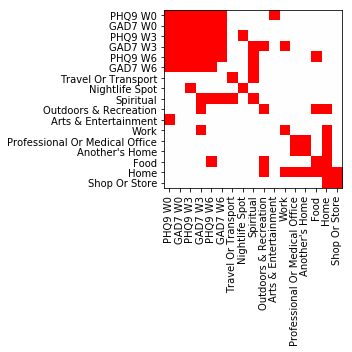

In [46]:
plot_confusion_matrix(pval<0.05, labels=labs, cmap=plt.cm.bwr, xsize=5, ysize=5)

## Estimating Correlations (no bootstrap)

In [9]:
# only mental health vars vs semantic locaiton

from scipy.stats import pearsonr, spearmanr

target = data_new[['PHQ9 W0','PHQ9 W3','PHQ9 W6','GAD7 W0','GAD7 W3','GAD7 W6']]
location = data_new.drop(['PHQ9 W0','PHQ9 W3','PHQ9 W6','GAD7 W0','GAD7 W3','GAD7 W6'],axis=1)

r = pd.DataFrame(index=location.columns, columns=target.columns)
p = pd.DataFrame(index=location.columns, columns=target.columns)
tab = pd.DataFrame(index=location.columns, columns=target.columns, dtype=str)
for tar in target.columns:
    for loc in location.columns:
        x = target.loc[:,tar].astype(float)
        y = location.loc[:,loc].astype(float)
        indnan = np.where(np.logical_or(np.isnan(x),np.isnan(y)))[0]
        x = x.drop(indnan)
        y = y.drop(indnan)
        x = x.reset_index(drop=True)
        y = y.reset_index(drop=True)
        rr,pp = pearsonr(x,y)
        r.loc[loc,tar] = rr
        p.loc[loc,tar] = pp


## Estimating Correlations (with bootstrap)

In [58]:
# only mental health vars vs semantic locaiton - with bootstrap

from scipy.stats import pearsonr, spearmanr

target = data_new[['PHQ9 W0','PHQ9 W3','PHQ9 W6','GAD7 W0','GAD7 W3','GAD7 W6']]
location = data_new.drop(['PHQ9 W0','PHQ9 W3','PHQ9 W6','GAD7 W0','GAD7 W3','GAD7 W6'],axis=1)

n_bs = 1000
np.random.seed(seed=0)

corr_med = pd.DataFrame(index=location.columns, columns=target.columns)
corr_hi = pd.DataFrame(index=location.columns, columns=target.columns)
corr_lo = pd.DataFrame(index=location.columns, columns=target.columns)
for tar in target.columns:
    for loc in location.columns:
        x = target.loc[:,tar].astype(float)
        y = location.loc[:,loc].astype(float)
        indnan = np.where(np.logical_or(np.isnan(x),np.isnan(y)))[0]
        x = x.drop(indnan)
        y = y.drop(indnan)
        x = x.reset_index(drop=True)
        y = y.reset_index(drop=True)
        r = np.zeros([n_bs])
        p = np.zeros([n_bs])
        for bs in range(n_bs):
            ind = np.random.choice(np.arange(x.size), size=x.size, replace=True)
            x_s = x.loc[ind]
            y_s = y.loc[ind]
            r[bs],p[bs] = pearsonr(np.array(x_s),np.array(y_s))
        corr_med.loc[loc,tar] = np.nanmedian(r)
        corr_hi.loc[loc,tar] = np.percentile(r, 97.5)
        corr_lo.loc[loc,tar] = np.percentile(r, 2.5)

## Distribution of an example correlation coefficient

(array([   1.,    4.,    9.,   22.,   45.,   65.,   70.,   98.,   90.,
         121.,   81.,   94.,   67.,   64.,   60.,   46.,   14.,   11.,
          12.,   10.,    7.,    7.,    0.,    1.,    1.]),
 array([ -2.14075666e-01,  -1.96249229e-01,  -1.78422792e-01,
         -1.60596355e-01,  -1.42769918e-01,  -1.24943481e-01,
         -1.07117044e-01,  -8.92906074e-02,  -7.14641704e-02,
         -5.36377335e-02,  -3.58112966e-02,  -1.79848597e-02,
         -1.58422736e-04,   1.76680142e-02,   3.54944511e-02,
          5.33208880e-02,   7.11473250e-02,   8.89737619e-02,
          1.06800199e-01,   1.24626636e-01,   1.42453073e-01,
          1.60279510e-01,   1.78105947e-01,   1.95932383e-01,
          2.13758820e-01,   2.31585257e-01]),
 <a list of 25 Patch objects>)

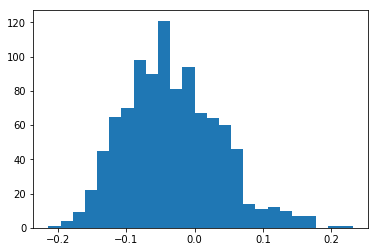

In [55]:
%matplotlib inline
plt.hist(r,25)

In [59]:
# print the table
corr_med

,PHQ9 W0,PHQ9 W3,PHQ9 W6,GAD7 W0,GAD7 W3,GAD7 W6
Travel Or Transport,-0.0696059,-0.037481,-0.112824,0.0815418,0.0116736,-0.087639
Nightlife Spot,-0.126414,-0.173285,-0.0445139,0.0411177,-0.0626649,-0.0452896
Spiritual,-0.0405381,-0.0777589,-0.146886,-0.0943434,-0.143183,-0.167904
Outdoors & Recreation,0.0155542,-0.116833,-0.100953,-0.0652729,-0.13103,-0.109031
Arts & Entertainment,-0.171645,-0.0917251,-0.089654,-0.0437395,-0.0546659,-0.0567544
Work,-0.0844939,-0.139099,-0.139941,-0.0829853,-0.175886,-0.0848681
Professional Or Medical Office,0.0291867,0.095929,0.0494961,-0.0694027,0.0191941,0.0506333
Another's Home,0.0455574,-0.0652971,-0.0644623,-0.0156082,-0.00327843,0.000322392
Food,-0.0882706,-0.0933537,-0.151897,-0.0886359,-0.085519,-0.114836
Home,0.0565664,0.0733702,0.0889717,0.082882,0.100504,0.0969111


In [60]:
np.sign(corr_lo)+np.sign(corr_hi)

,PHQ9 W0,PHQ9 W3,PHQ9 W6,GAD7 W0,GAD7 W3,GAD7 W6
Travel Or Transport,0,0,-2,0,0,-2
Nightlife Spot,-2,-2,0,0,0,0
Spiritual,0,0,-2,0,-2,-2
Outdoors & Recreation,0,0,0,0,0,0
Arts & Entertainment,-2,0,0,0,0,0
Work,0,0,0,0,-2,0
Professional Or Medical Office,0,2,0,0,0,0
Another's Home,0,0,0,0,0,0
Food,0,0,-2,0,0,0
Home,0,0,0,0,0,0


In [18]:
np.max(corr_hi, keepdims=False)

PHQ9 W0    0.226642
PHQ9 W3    0.300850
PHQ9 W6    0.282217
GAD7 W0    0.233019
GAD7 W3    0.228345
GAD7 W6    0.235018
dtype: float64

In [19]:
np.min(corr_lo, keepdims=False)

PHQ9 W0   -0.237318
PHQ9 W3   -0.299829
PHQ9 W6   -0.272490
GAD7 W0   -0.206892
GAD7 W3   -0.308565
GAD7 W6   -0.253944
dtype: float64

In [35]:
.05/66

0.0007575757575757576